# Simple RNN

In [1]:
import tensorflow as tf
import numpy as np
import tensorflow.keras as ke
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train[..., np.newaxis] / 255.0
x_test = x_test[..., np.newaxis] / 255.0

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

datagen.fit(x_train)

In [3]:
# RNN model along with Dropout Layer and Batch Normalization
model = Sequential([
    SimpleRNN(256, input_shape=(28, 28), activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\HP\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# Model training
history = model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=5, validation_data=(x_test, y_test))

Epoch 1/5


C:\Users\HP\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.4795 - loss: 1.4482 - val_accuracy: 0.8254 - val_loss: 0.5047
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.7841 - loss: 0.6903 - val_accuracy: 0.9339 - val_loss: 0.2497
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.8742 - loss: 0.4865 - val_accuracy: 0.9389 - val_loss: 0.2265
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.8972 - loss: 0.4178 - val_accuracy: 0.9537 - val_loss: 0.1835
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.9150 - loss: 0.3624 - val_accuracy: 0.9540 - val_loss: 0.1797


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9480 - loss: 0.2092


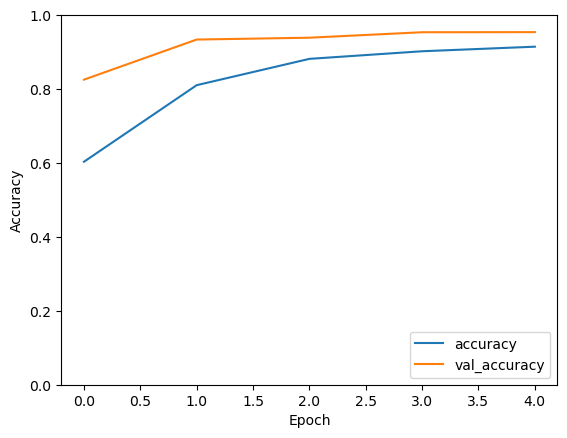

In [7]:
model.evaluate(x_test, y_test)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [16]:
#Custom input
images = cv2.imread('./2(1).png', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(images, (28, 28))
image = image.reshape(1, 28, 28, 1) / 255.0

output = model.predict(image)
print(output)
print(np.argmax(output))
# Print the model's output and the predicted class
print("Model Output:", output)
print("Predicted Class:", np.argmax(output))

# Display the image using matplotlib
plt.imshow(images, cmap='gray')  # Display the image in grayscale
plt.title(f"Predicted Class: {np.argmax(output)}")
plt.axis('off')  # Hide axes
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[[0.03788875 0.02163628 0.8686755  0.01169418 0.00177419 0.01451885
  0.01398533 0.00185802 0.02653369 0.00143528]]
2
